# Problem Statement

For the capstone project, the chosen problem statement is using the Instacart dataset to perform market basket analysis. Knowing which products customers commonly purchase together can help Instacart formulate retail strategies, such as coming up with discounts for bundle purchases. Items that are frequently bought together can also be located near one another to improve logistics efficiency when retrieving and packing customer orders.

## Data Source

The Instacart dataset was downloaded from the following Kaggle link: https://www.kaggle.com/competitions/instacart-market-basket-analysis/data as the link provided in the Project 4 markdown file was broken.


## Description of Datasets

The raw data is broken into 6 main files:
1. departments.csv which contains the departments that each of the products belong to
2. aisles.csv which contains the aisles that each of the products can be found in
3. order_products__prior.csv which contains all previously ordered products by all users, except for the last few orders of each user. Dataset contains order_id, product_id, order in which the product was added to cart (add_to_cart_order) and whether product was reordered (reordered)
4. order_products__train.csv which contains part of the last few orders of all users. Data fields are similar to order_products__prior.csv.
5. products.csv which contains the mapping of product_id to product details such as product name, aisle_id and department_id
6. orders.csv which contains the mapping of order_id to order details including user_id, day of week when the order was placed (order_dow) and hour of the day when the order was placed (order_dow)

Reference for description of order_products__prior.csv and order_products__train.csv: https://suniljammalamadaka.medium.com/instacart-market-basket-analysis-ac12e586dcc7

Since the main objective of this project is to do market basket analysis rather than a predictive model, we can combine the orders in both order_products__prior and order_products__train as we do not really need to separate the datasets into training and test sets for this analysis.

### Note: Due to the file size of the raw data, I am unable to upload the order_products__prior.csv, order_products__train.csv and orders.csv datasets in their entirety onto my Github page. 

### These datasets were further processed according to the steps documented below, and the processed, smaller datasets have been uploaded onto Github.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
# Read in order_prior dataset

# order_prior = pd.read_csv('order_products__prior.csv')

In [7]:
# Check unique number of order ids in order_prior dataset

# len(order_prior['order_id'].unique())

3214874

In [8]:
# Read in order_train dataset

# order_train = pd.read_csv('order_products__train.csv')

In [9]:
# Check unique number of order ids in order_train dataset

# len(order_train['order_id'].unique())

131209

In [10]:
# See features in order_prior dataset

# list(order_prior)

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [11]:
# See features in order_train dataset

# list(order_train)

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [12]:
# Append both datasets together

# order_both = order_prior.append(order_train)

## Random sampling of data (10%)

In the order_prior and order_train datasets, one observation contains only one product, i.e. if an order with order_id "1234" contains 10 products, order_id "1234" then spans across 10 observations. As the main objective of this project is to do market basket analysis, it is important to get the complete contents of the orders that we examine. 

Hence we first generate a list of all existing order_ids from the combined order_prior and order_train dataset, then take a 10% random sample of order_ids from that list. We then select all observations corresponding to each of the order_ids in the chosen sample. This sampled dataset is compressed and uploaded into Github as "orders_10pct.7z".

In [16]:
# Generate the value of 10% of all order_ids

# ten_percent = int(0.1 * len(order_both['order_id'].unique()))

In [17]:
# Print value

# ten_percent

334608

In [21]:
# Pick a 10% random sample of all order_ids

# unique_order_ids = order_both['order_id'].unique().tolist()

# tenpct_order_ids = random.sample(unique_order_ids, ten_percent)

In [22]:
# Check the number of order_ids in the sample

# len(tenpct_order_ids)

334608

In [23]:
# Filter the order dataset to only retain observations with the order_ids in the sample

# order_both = order_both.loc[order_both['order_id'].isin(tenpct_order_ids)]

In [ ]:
# Export 10% sampled order dataset
# The orders_10pct.csv file is further compressed and uploaded into Github as "orders_10pct.7z".

# order_both.to_csv('orders_10pct.csv')

### The rest of the analysis below will be based on the "orders_10pct.csv" dataset (unzipped from the "orders_10pct.7z" file, which is uploaded onto Github). Rename the dataset to "order_products".

In [2]:
# Read in order_products dataset again after unzipping 'orders_10pct.7z' file

order_products = pd.read_csv('orders_10pct.csv')

In [3]:
# Check for null values. There are no null values in the dataset.

order_products.isnull().sum()

Unnamed: 0           0
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [4]:
# Find the top 20 most ordered products

top_20_products = pd.DataFrame(order_products['product_id'].value_counts().head(20).rename_axis('product_id').reset_index(name='counts')) 

In [5]:
# Merge in products.csv to get product details such as product name, aisle_id and department_id

product_details = pd.read_csv('products.csv')

top_20_products = top_20_products.merge(product_details, how="left", on="product_id")

# Merge in aisles.csv and departments.csv to get aisle and department names

aisle_details = pd.read_csv('aisles.csv')

dept_details = pd.read_csv('departments.csv')

top_20_products = top_20_products.merge(aisle_details, how="left", on="aisle_id")

top_20_products = top_20_products.merge(dept_details, how="left", on="department_id")


In [6]:
# The top 20 products ordered are fresh fruits and vegetables, packaged vegetables and fruits, and milk

top_20_products['aisle'].value_counts()

fresh fruits                  11
packaged vegetables fruits     4
fresh vegetables               4
milk                           1
Name: aisle, dtype: int64

In [7]:
# 19 of the 20 products are in the produce department

top_20_products['department'].value_counts()

produce       19
dairy eggs     1
Name: department, dtype: int64

In [8]:
# Organic whole milk is the remaining product that is not in the produce department
# instead it can be found in the dairy eggs department 

top_20_products.loc[top_20_products['department']!='produce']

,product_id,counts,product_name,aisle_id,department_id,aisle,department
9,27845,14465,Organic Whole Milk,84,16,milk,dairy eggs


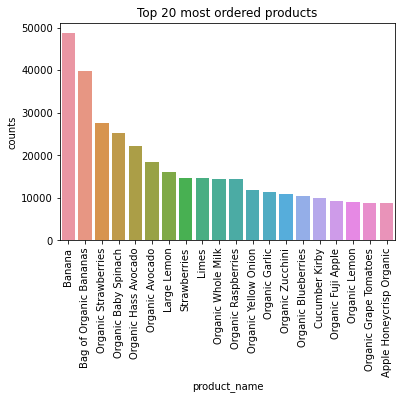

In [9]:
# Plot the top 20 most ordered products by product name and counts

sns.barplot(x='product_name', y='counts', data=top_20_products)

ax = sns.barplot(x='product_name', y='counts', data=top_20_products)

plt.xticks(rotation=90)

plt.title('Top 20 most ordered products')
  
plt.show()

### The most popular products on Instacart are bananas, strawberries and baby spinach. The rest of the products are a variety of other fruits and vegetables, as well as organic whole milk. It appears that Instacart customers are pretty health-conscious!

In [10]:
# Find the top 100 most ordered products

top_100_products = pd.DataFrame(order_products['product_id'].value_counts().head(100).rename_axis('product_id').reset_index(name='counts'))

# Merge in products.csv to get product details such as product name, aisle_id and department_id

top_100_products = top_100_products.merge(product_details, how="left", on="product_id")

# Merge in aisles.csv and departments.csv to get aisle and department names

top_100_products = top_100_products.merge(aisle_details, how="left", on="aisle_id")

top_100_products = top_100_products.merge(dept_details, how="left", on="department_id")

top_100_products.head()

,product_id,counts,product_name,aisle_id,department_id,aisle,department
0,24852,48681,Banana,24,4,fresh fruits,produce
1,13176,39937,Bag of Organic Bananas,24,4,fresh fruits,produce
2,21137,27661,Organic Strawberries,24,4,fresh fruits,produce
3,21903,25342,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
4,47209,22085,Organic Hass Avocado,24,4,fresh fruits,produce


In [11]:
# Group up the top 100 products by aisle and department 

sum100 = pd.DataFrame(top_100_products.groupby(['aisle', 'department'])['counts'].sum())

sum100 = sum100.reset_index()

# Set department as categorical variable 

sum100['department'] = pd.Categorical(sum100['department'])

# Sort in descending order by counts

sum100 = sum100.sort_values(by=['counts'], ascending=False)

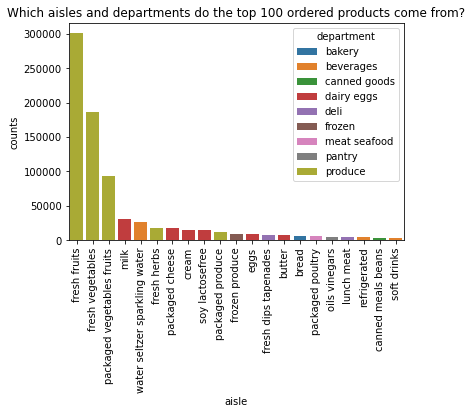

In [12]:
# Plot the top 100 products by aisle and department

sns.barplot(x="aisle", y="counts", data=sum100, hue='department', dodge=False)

plt.xticks(rotation=90)

plt.title('Which aisles and departments do the top 100 ordered products come from?')
  
plt.show()


### From the graph, we can see that most of the ordered products come from the produce department, followed by the dairy & eggs department.

### 3 aisles in the beverages department also feature in the graph, namely water seltzer sparkling water, refrigerated beverages and soft drinks.

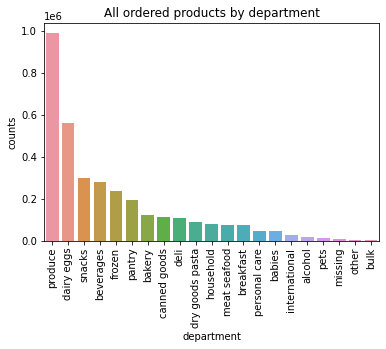

In [13]:
# Group up all ordered products and plot by department

all_products = pd.DataFrame(order_products['product_id'].value_counts().rename_axis('product_id').reset_index(name='counts'))

# Merge in products.csv to get product details such as product name, aisle_id and department_id

all_products = all_products.merge(product_details, how="left", on="product_id")

# Merge in aisles.csv and departments.csv to get aisle and department names

all_products = all_products.merge(aisle_details, how="left", on="aisle_id")

all_products = all_products.merge(dept_details, how="left", on="department_id")

all_products.head()

# Group up all products by department 

sum_all = pd.DataFrame(all_products.groupby(['department'])['counts'].sum())

sum_all = sum_all.reset_index()

# Set department as categorical variable 

sum_all['department'] = pd.Categorical(sum_all['department'])

# Sort in descending order by counts

sum_all = sum_all.sort_values(by=['counts'], ascending=False)

# Plot by department

sns.barplot(x="department", y="counts", data=sum_all, order=sum_all.sort_values("counts", ascending=False).department)

plt.xticks(rotation=90)

plt.title('All ordered products by department')
  
plt.show()

### Consolidating across all orders, the top five departments are produce, dairy eggs, snacks, beverages and frozen food. 

### Another interesting finding is that Instacart also sells baby and pet products.

---------

## Examining orders.csv, which contains the mapping of order_id to order details including day of week and hour of day when the order was placed 

In [14]:
# Read in orders.csv from raw dataset

# order_details = pd.read_csv('orders.csv')

# Since we extracted a 10% random sample of order_ids, 
# we only retain the subset of order_details with the corresponding order_ids

# order_details = order_details.loc[order_details['order_id'].isin(tenpct_order_ids)]

# Write the order_details into a csv file. This csv file is uploaded onto Github.

# order_details.to_csv('order_details_10pct.csv')

In [14]:
# Read in order_details.csv

order_details = pd.read_csv('order_details_10pct.csv')

In [15]:
# Check out order_details dataset
# Only the days_since_prior_order variable contains null values

order_details.isna().sum()

Unnamed: 0                    0
order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20745
dtype: int64

In [16]:
order_details.dtypes

Unnamed: 0                  int64
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

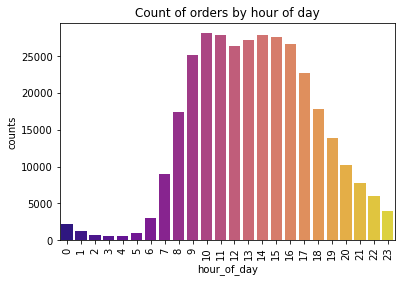

In [17]:
# Plot number of orders by order_hour_of_day

order_by_hour = pd.DataFrame(order_details['order_hour_of_day'].value_counts().rename_axis('hour_of_day').reset_index(name='counts'))

sns.barplot(x="hour_of_day", y="counts", data=order_by_hour, palette='plasma')

plt.xticks(rotation=90)

plt.title('Count of orders by hour of day')
  
plt.show()

### Most orders are placed between 9am to 5pm.

### In the morning after 6am, orders increase sharply until around 10am, with a slight dip during noon. After noon, orders rise again with another mini peak at 2pm, and gradually taper off until around 5pm.

### The number of orders start to decline sharply in the evening after 5pm, bottoming at around 4am.

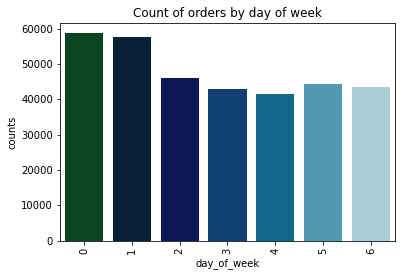

In [18]:
# Plot number of orders by order_dow

order_by_dow = pd.DataFrame(order_details['order_dow'].value_counts().rename_axis('day_of_week').reset_index(name='counts'))

sns.barplot(x="day_of_week", y="counts", data=order_by_dow, palette='ocean')

plt.xticks(rotation=90)

plt.title('Count of orders by day of week')
  
plt.show()

### Since Sunday is considered the first day of the week in the United States where Instacart is based in, we assume that day 1 refers to Sunday, and day 0 refers to Saturday.

### We can see from the chart that more customers place grocery orders during the two days of the weekend, compared to the other days of the week.

In [19]:
# Merge order_products and order_details

order_full = order_products.merge(order_details, how='left', on='order_id')

In [20]:
# See whether there is variation in the most popular product that is ordered by hour of day

order_hour_product = pd.DataFrame(order_full.value_counts(['order_hour_of_day', 'product_id']))

order_hour_product = order_hour_product.reset_index()

order_hour_product.rename(columns={0: 'counts'}, inplace=True)

order_hour_product['max_by_hour'] = order_hour_product.groupby(['order_hour_of_day'])['counts'].transform(max)

top_product_by_hour = order_hour_product.loc[order_hour_product['max_by_hour']==order_hour_product['counts']]

top_product_by_hour = top_product_by_hour.merge(product_details, how="left", on="product_id")

top_product_by_hour

,order_hour_of_day,product_id,counts,max_by_hour,product_name,aisle_id,department_id
0,10,24852,4126,4126,Banana,24,4
1,14,24852,4004,4004,Banana,24,4
2,11,24852,3903,3903,Banana,24,4
3,16,24852,3863,3863,Banana,24,4
4,13,24852,3849,3849,Banana,24,4
5,9,24852,3840,3840,Banana,24,4
6,15,24852,3813,3813,Banana,24,4
7,12,24852,3634,3634,Banana,24,4
8,17,24852,3273,3273,Banana,24,4
9,8,24852,2813,2813,Banana,24,4


### There is no variation in the most popular product that is ordered by hour of day. At all hours, the top ordered product is bananas.

In [21]:
# See whether there is variation in the most popular product that is ordered by day of week

order_dow_product = pd.DataFrame(order_full.value_counts(['order_dow', 'product_id']))

order_dow_product = order_dow_product.reset_index()

order_dow_product.rename(columns={0: 'counts'}, inplace=True)

order_dow_product['max_by_dow'] = order_dow_product.groupby(['order_dow'])['counts'].transform(max)

top_product_by_dow = order_dow_product.loc[order_dow_product['max_by_dow']==order_dow_product['counts']]

top_product_by_dow = top_product_by_dow.merge(product_details, how="left", on="product_id")

top_product_by_dow

,order_dow,product_id,counts,max_by_dow,product_name,aisle_id,department_id
0,0,24852,9988,9988,Banana,24,4
1,1,24852,9046,9046,Banana,24,4
2,6,24852,6583,6583,Banana,24,4
3,2,24852,6279,6279,Banana,24,4
4,5,24852,5982,5982,Banana,24,4
5,3,24852,5505,5505,Banana,24,4
6,4,24852,5298,5298,Banana,24,4


### Similarly, there is no variation in the most popular product that is ordered by day of week. The top ordered product every day is bananas.

-------------------

## Market Basket Analysis

Reference: https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106

In [22]:
# Use the order_products dataset which contains order_id and product_id 
# to perform the market basket analysis.

# Tried using the 10pct sample to do the market basket analysis,
# ran out of memory space

# Try with 0.5pct sample instead, i.e. 5pct of 10pct sample

tenpct_order_ids = order_products['order_id'].unique().tolist()

onepct_order_ids = random.sample(tenpct_order_ids, int(0.05*len(tenpct_order_ids)))

In [23]:
# Filter the order dataset to only retain observations with the order_ids in the sample

order_mba = order_products.loc[order_products['order_id'].isin(onepct_order_ids)]

## Filtering the list of products used

After reducing the order dataset to a 0.5% sample, I filtered the list of products as well.

While there are a total of 49,688 possible products, using the whole universe of products would result in an enormous dataset when reshaped to wide form for market basket analysis.

Since the reference article used a dataset with 3,844 products, I first tried to narrow the list of products to the top 3,000 but still ran out of memory to process the dataset.

Therefore, the dataset was eventually refined to the top 1,000 products for the market basket analysis.

In [24]:
# Filter the list of products to the top 1,000 purchased products

top_1000_products = pd.DataFrame(order_products['product_id'].value_counts().head(1000).rename_axis('product_id').reset_index(name='counts'))

top_1000_product_ids = top_1000_products['product_id'].unique().tolist()

In [25]:
# Filter the order_mba dataset to only retain observations with these product ids

order_mba = order_mba.loc[order_mba['product_id'].isin(top_1000_product_ids)]

In [26]:
# Create a quantity column to denote that the product was ordered

order_mba['quantity'] = 1

# Merge in product_details dataset to get product names

order_mba = order_mba.merge(product_details, how='left', on='product_id')

# Select only the needed columns from the dataset

order_mba = order_mba.filter(['order_id', 'product_name', 'quantity'])

In [27]:
# Reshape the data to required wide format for the market basket analysis

order_mba_wide = order_mba.groupby(['order_id', 'product_name'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [28]:
# Check out the order_mba_wide data after reshaping

order_mba_wide.head()

product_name,0% Greek Strained Yogurt,1% Low Fat Milk,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Grated Parmesan Cheese,100% Lactose Free Fat Free Milk,100% Natural Spring Water,100% Pure Pumpkin,100% Raw Coconut Water,100% Recycled Bathroom Tissue,...,YoKids Squeeze! Organic Strawberry Flavor Yogurt,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,"Yogurt, Lowfat, Strawberry","Yogurt, Strained Low-Fat, Coconut",Yotoddler Organic Pear Spinach Mango Yogurt,Yukon Gold Potatoes 5lb Bag,ZBar Organic Chocolate Brownie Energy Snack,Zero Calorie Cola
order_id,,,,,,,,,,,,,,,,,,,,,
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
list(order_mba_wide)

['0% Greek Strained Yogurt',
 '1% Low Fat Milk',
 '1% Lowfat Milk',
 '100 Calorie  Per Bag Popcorn',
 '100% Grated Parmesan Cheese',
 '100% Lactose Free Fat Free Milk',
 '100% Natural Spring Water',
 '100% Pure Pumpkin',
 '100% Raw Coconut Water',
 '100% Recycled Bathroom Tissue',
 '100% Recycled Paper Towels',
 '100% Whole Wheat Bread',
 '2% Reduced Fat DHA Omega-3 Reduced Fat Milk',
 '2% Reduced Fat Milk',
 '2% Reduced Fat Organic Milk',
 '6 OZ LA PANZANELLA CROSTINI ORIGINAL CRACKERS',
 '85% Lean Ground Beef',
 '90% Lean Ground Beef',
 '93% Ground Beef',
 'ALMONDBREEZE UNSWEETENED',
 'Aged White Cheddar Baked Rice & Corn Puffs Gluten Free Lunch Packs',
 'Air Chilled Breaded Chicken Breast Nuggets',
 'Air Chilled Organic Boneless Skinless Chicken Breasts',
 'All Natural Apricot Sparkling Water',
 'All Natural Marinara Sauce',
 'All Natural Virgin Lemonade',
 'All Purpose Flour',
 'Almond Breeze Original Almond Milk',
 'Almond Milk Strawberry Yogurt',
 'Almond Nut & Rice Cracker Snack

In [30]:
# Check one of the products in the list to make sure that there are some quantities ordered

order_mba_wide['85% Lean Ground Beef'].value_counts(dropna=False)

0.0    15322
1.0       56
Name: 85% Lean Ground Beef, dtype: int64

In [31]:
# Select order_ids that contain more than 1 item purchased
# If the order only contains 1 item, then it is not relevant for 
# market basket analysis, i.e. uncovering the association between 2 or more items

order_mba_wide_filter = order_mba_wide[(order_mba_wide > 0).sum(axis=1) >= 2]

In [32]:
# Check out the order_mba_wide_filter dataset

order_mba_wide_filter.head(5)

product_name,0% Greek Strained Yogurt,1% Low Fat Milk,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Grated Parmesan Cheese,100% Lactose Free Fat Free Milk,100% Natural Spring Water,100% Pure Pumpkin,100% Raw Coconut Water,100% Recycled Bathroom Tissue,...,YoKids Squeeze! Organic Strawberry Flavor Yogurt,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,"Yogurt, Lowfat, Strawberry","Yogurt, Strained Low-Fat, Coconut",Yotoddler Organic Pear Spinach Mango Yogurt,Yukon Gold Potatoes 5lb Bag,ZBar Organic Chocolate Brownie Energy Snack,Zero Calorie Cola
order_id,,,,,,,,,,,,,,,,,,,,,
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Import apriori and association_rules from mlxtend library

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Apriori algorithm using min support value of 0.02

The apriori algorithm generates frequent itemsets, which are then used to build the association rules. The frequent itemsets are defined as itemsets which have a support value >= a minimum threshold. In this case, the min support value is 0.02.

This means that these products or combinations of products that make up the itemset are found in at least 2% of all orders.

The 2% min support value was determined based on a trial and error process, with the threshold initially set at 3% following the reference article.

However, I was not able to generate any association rules based on the 3% threshold, hence the eventual 2% threshold used here.

In [35]:
# Generate frequent itemsets that have a support of at least 0.02.
# This means that these products, or combinations of products,
# are found in at least 2% of all orders in the dataset

frequent_items = apriori(order_mba_wide_filter,
                         min_support=0.02,
                         use_colnames=True).sort_values('support', 
                                                         ascending=False).reset_index(drop=True)


C:\Users\Chan Ying Jie\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
# Add in a 'length' column so that we can see how many items are in each itemset
# For instance, one of the itemsets with 2 items is (Banana, Organic Baby Spinach),
# which means that this combination occurs in at least 2% of all orders.

frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))

frequent_items

,support,itemsets,length
0,0.178966,(Banana),1
1,0.146310,(Bag of Organic Bananas),1
2,0.098791,(Organic Strawberries),1
3,0.093011,(Organic Baby Spinach),1
4,0.082051,(Organic Hass Avocado),1
...,...,...,...
57,0.020869,"(Bag of Organic Bananas, Organic Baby Spinach)",2
58,0.020719,(Organic Peeled Whole Baby Carrots),1
59,0.020419,(Organic Garnet Sweet Potato (Yam)),1
60,0.020269,(Lime Sparkling Water),1


In [37]:
# Build the association rules using the frequent itemset with their corresponding support, confidence and lift:

association_rules(frequent_items, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bag of Organic Bananas),(Organic Hass Avocado),0.146310,0.082051,0.023797,0.162648,1.982276,0.011792,1.096252
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.082051,0.146310,0.023797,0.290027,1.982276,0.011792,1.202426
2,(Banana),(Organic Avocado),0.178966,0.069064,0.021995,0.122903,1.779551,0.009635,1.061383
3,(Organic Avocado),(Banana),0.069064,0.178966,0.021995,0.318478,1.779551,0.009635,1.204708
4,(Bag of Organic Bananas),(Organic Strawberries),0.146310,0.098791,0.023422,0.160082,1.620405,0.008967,1.072972
5,(Organic Strawberries),(Bag of Organic Bananas),0.098791,0.146310,0.023422,0.237082,1.620405,0.008967,1.118980
6,(Bag of Organic Bananas),(Organic Baby Spinach),0.146310,0.093011,0.020869,0.142637,1.533552,0.007261,1.057882
7,(Organic Baby Spinach),(Bag of Organic Bananas),0.093011,0.146310,0.020869,0.224374,1.533552,0.007261,1.100647
8,(Organic Strawberries),(Banana),0.098791,0.178966,0.020194,0.204407,1.142160,0.002513,1.031978
9,(Banana),(Organic Strawberries),0.178966,0.098791,0.020194,0.112836,1.142160,0.002513,1.015830


## Explanation of key terms and metrics

References: 

1. https://practicaldatascience.co.uk/data-science/how-to-use-the-apriori-algorithm-for-market-basket-analysis

2. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

3. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

### Antecedents and consequents

In association rule learning, association rules are expressed in the form X -> Y. For example, Diapers -> Wet Wipes suggests that customers who buy diapers are also likely to buy wet wipes. In this case, diapers are the antecedent, while wet wipes are the consequent.

### Antecedent support and consequent support

Antecedent support computes the proportion of orders that contain the antecedent product, and consequent support computes the proportion of orders that contain the consequent product.

### Support 

The support metric computes the proportion of orders that contain the combined itemset consisting of both the antecedent product and the consequent product.

### Confidence

The confidence value indicates how likely the X -> Y rule is to be true. For example, if Diapers -> Wet Wipes rule has a confidence value of 0.9, it means that 90% of customers who buy diapers also buy wet wipes at the same time.

### Lift

The lift metric measures how much more often the antecedent and consequent occur together than we would expect if they were statistically independent. For example, for the Diapers -> Wet Wipes rule, the support for this rule might be 2%, meaning that 2% of orders include both diapers and wet wipes. Let's say that diapers appear in 10% of orders, and wet wipes appear in 5% of orders. The lift can therefore be computed as 0.02 / (0.1 * 0.05) = 4.

A higher lift value, particularly over 1, signals a stronger association between the items.

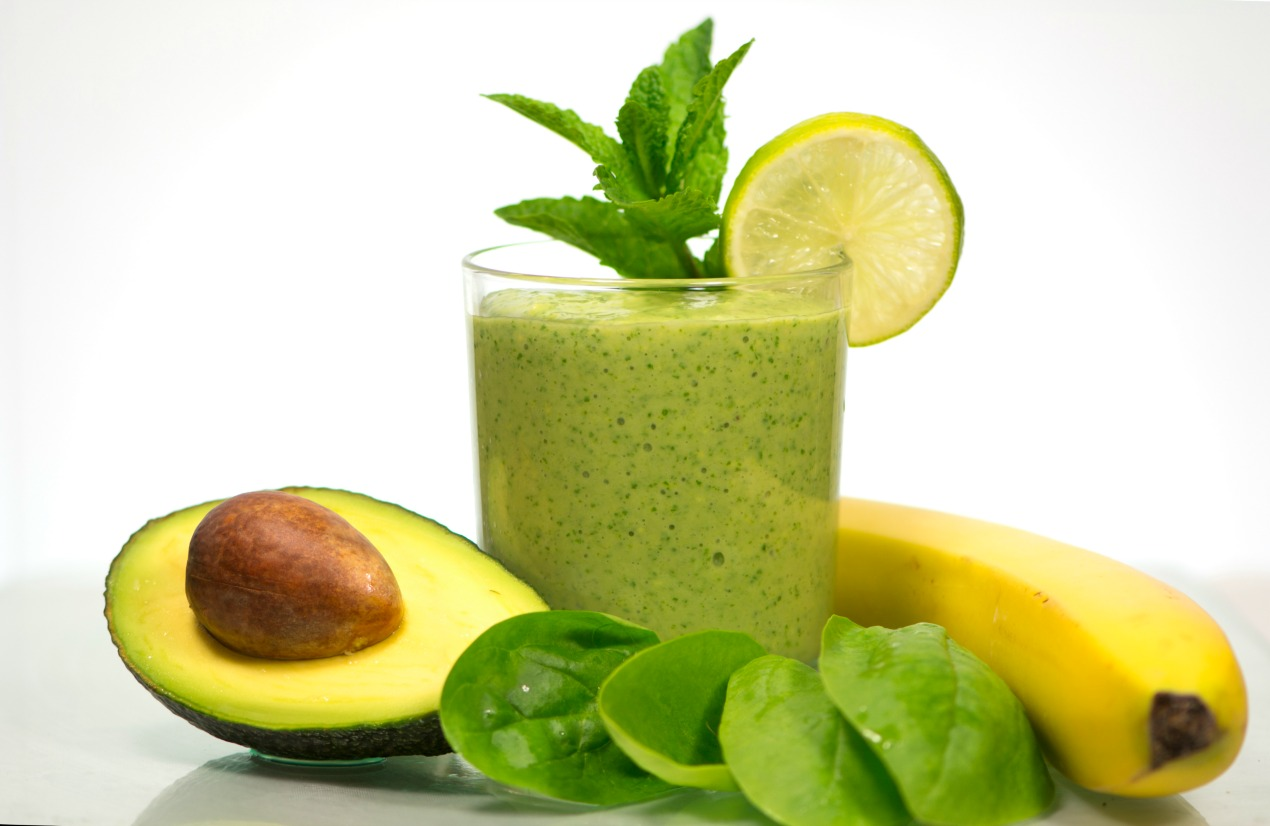

## Interpretation of results

Organic Hass Avocado -> Organic Bananas has the highest lift of nearly 2, and the second highest confidence of 0.29 after the association rule of Organic Avocado -> Banana. This means that almost 30% of customers who buy Organic Hass Avocado also buy Organic Bananas at the same time. In fact, the first four rules are simply variations of the avocado and banana pairing. 

The next significant association rule is Organic Strawberries -> Organic Bananas, with a lift of 1.62 and confidence of 0.24. This is followed by a similar rule of Organic Bananas -> Organic Strawberries.

The final pairing is for baby spinach and bananas, with 4 variations of this food combination. Among them, the variation with the highest lift value of 1.42 and confidence of 0.21 is the association rule of Organic Baby Spinach -> Organic Bananas.

From the results, my main hypothesis is that these fruit and vegetable combinations are purchased by customers to create their favourite smoothie drinks, with bananas being a popular base fruit for smoothies.

## Recommendations and applications

With the knowledge that customers frequently buy avocados, strawberries and spinach together with bananas, Instacart can possibly implement the following applications:

1. Positioning of products in the store: For easier retrieving and packing of customer orders, the bananas could be put in a central location, with the other fruits and vegetables positioned strategically around the bananas. When customers shop in-store, the close proximity of the items could also serve as a reminder for them to add the associated products into their cart.


2. Bundling of products for sale: Bananas paired with avocados, strawberries or spinach could be sold in a bundle as a single product at a lower price, compared to the total cost of getting them separately. This could further encourage sales of these items.


3. Recommender engines: When customers check out with at least one of these items in their carts, a recommender prompt could appear to suggest adding the associated products to their orders as well. This prompt could even show a simple smoothie recipe to further entice customers into doing so.

## Possible extensions 

1. I was unable to generate the association rules for the entire dataset, with the market basket analysis being limited to only the top 1,000 products on a 0.5% sample of all orders. One possible refinement could be to look into methods such as parallel computing, so that much bigger datasets could be processed and analysed in an efficient manner without losing information.


2. As mentioned in the recommendations and applications section, the association rules generated could also be fed into recommender engines to further improve customers' retail experience. Such recommender engines could be developed if we are able to take into account more products and generate more insights, helping to facilitate grocery shopping for our Instacart users.